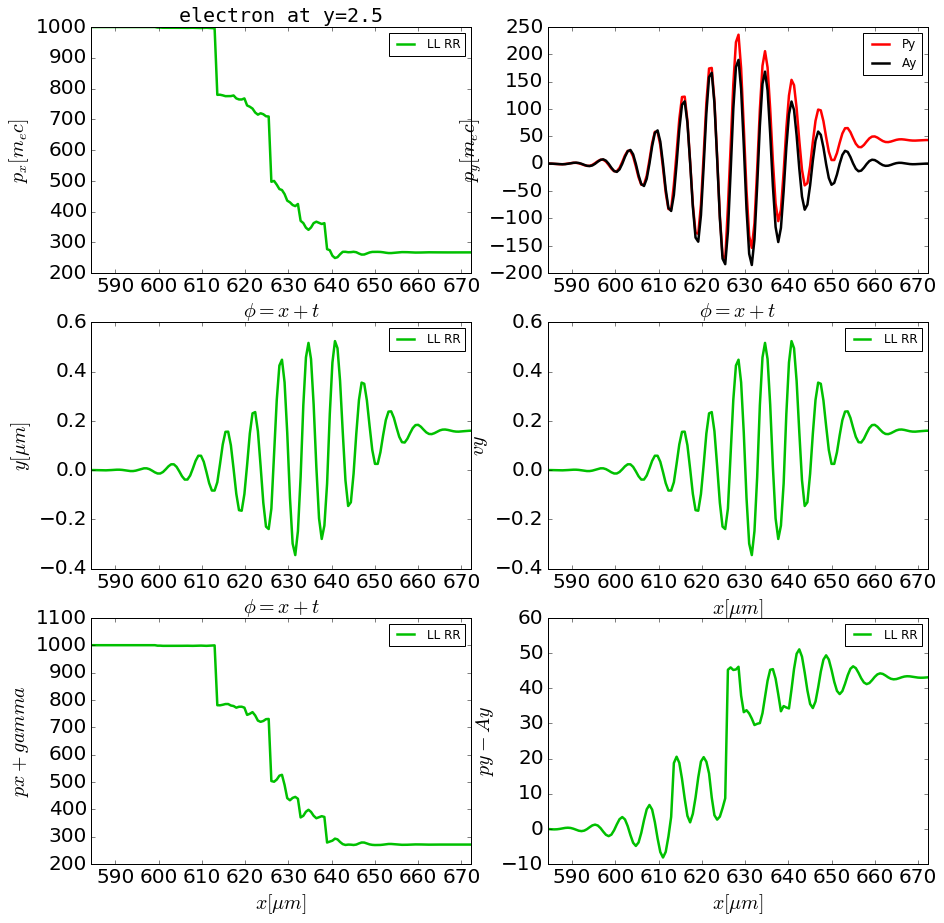

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
font = {'family' : 'monospace',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 20,
        }
part_number=2500
nsteps=2001

insert='q250_'
t=np.loadtxt(insert+'t'+'.txt')
y=np.loadtxt(insert+'y'+'.txt')
x=np.loadtxt(insert+'x'+'.txt')
px=np.loadtxt(insert+'px'+'.txt')
py=np.loadtxt(insert+'py'+'.txt')
ey=np.loadtxt(insert+'e_part'+'.txt')
bz=np.loadtxt(insert+'b_part'+'.txt')
ay=np.loadtxt(insert+'a_part'+'.txt')
radn=np.loadtxt(insert+'radn'+'.txt')
radt=np.loadtxt(insert+'radt'+'.txt')

t=np.reshape(t,(part_number,nsteps))
x=np.reshape(x,(part_number,nsteps))
y=np.reshape(y,(part_number,nsteps))
px=np.reshape(px,(part_number,nsteps))
py=np.reshape(py,(part_number,nsteps))
ey=np.reshape(ey,(part_number,nsteps))
ay=np.reshape(ay,(part_number,nsteps))
radn=np.reshape(radn,(part_number,nsteps))
radt=np.reshape(radt,(part_number,nsteps))

gamma=np.sqrt(px**2+py**2+1)

plt.subplot(221)
plt.scatter(x[:,-1]/2/np.pi,y[:,-1]/2/np.pi,s=8,c=(192.0/255.0,0.0,0.0),label='RR',edgecolors='None')
plt.legend(loc='upper right')
plt.xlim(0.0,100.0)
plt.ylim(-50,50)
plt.xlabel('$x [\mu m]$',fontdict=font)
plt.ylabel('$y [\mu m]$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
plt.title('electron scatter distribution',fontdict=font)

plt.subplot(222)
plt.scatter(y[:,0]/2/np.pi,py[:,-1],s=8,c=(192.0/255.0,0.0,0.0),edgecolors='None')
plt.legend(loc='upper right')
plt.xlim(-2.5,2.5)
#plt.ylim(-50,50)
plt.xlabel('$y_0 [\mu m]$',fontdict=font)
plt.ylabel('$p_y [m_ec]$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
plt.title('p_y distribution',fontdict=font)

plt.subplot(223)
plt.scatter(y[:,0]/2/np.pi,radt[:,-1],s=8,c=(192.0/255.0,0.0,0.0),edgecolors='None')
plt.legend(loc='upper right')
plt.xlim(-2.5,2.5)
#plt.ylim(-50,50)
plt.xlabel('$y_0 [\mu m]$',fontdict=font)
plt.ylabel('$radt$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
plt.title('radiated total energy',fontdict=font)

plt.subplot(224)
plt.scatter(y[:,0]/2/np.pi,radn[:,-1],s=8,c=(192.0/255.0,0.0,0.0),edgecolors='None')
plt.legend(loc='upper right')
plt.xlim(-2.5,2.5)
#plt.ylim(-50,50)
plt.xlabel('$y_0 [\mu m]$',fontdict=font)
plt.ylabel('$radn$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
plt.title('radiated total number',fontdict=font)

fig = plt.gcf()
fig.set_size_inches(15, 15)
fig.savefig(to_path+'scatter'+str(n).zfill(4)+'.png',format='png',dpi=60)


/home/michael/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


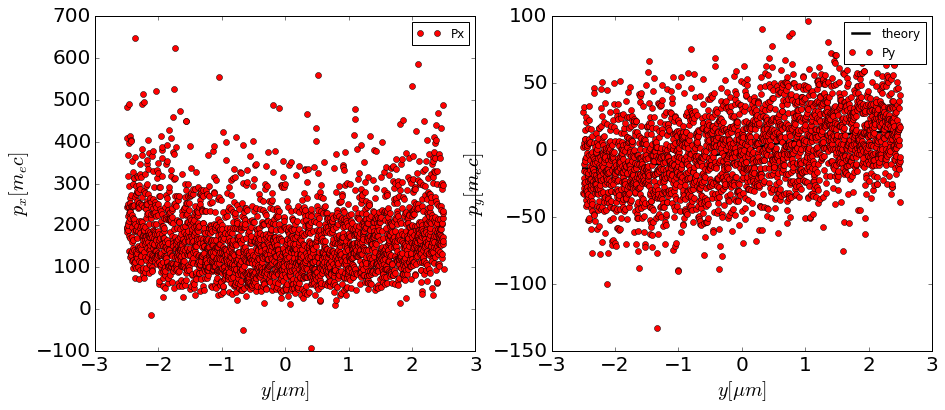

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.special as special
font = {'family' : 'monospace',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 20,
        }

part_number=2500
nsteps=2001

insert='q250_'
t=np.loadtxt(insert+'t'+'.txt')
y=np.loadtxt(insert+'y'+'.txt')
x=np.loadtxt(insert+'x'+'.txt')
px=np.loadtxt(insert+'px'+'.txt')
py=np.loadtxt(insert+'py'+'.txt')
ey=np.loadtxt(insert+'e_part'+'.txt')
bz=np.loadtxt(insert+'b_part'+'.txt')
ay=np.loadtxt(insert+'a_part'+'.txt')



t=np.reshape(t,(part_number,nsteps))
x=np.reshape(x,(part_number,nsteps))
y=np.reshape(y,(part_number,nsteps))
px=np.reshape(px,(part_number,nsteps))
py=np.reshape(py,(part_number,nsteps))
ey=np.reshape(ey,(part_number,nsteps))
ay=np.reshape(ay,(part_number,nsteps))
gamma=np.sqrt(px**2+py**2+1)

eta=1983.0
a_0=350
r_0=5.0
g_0=1000.0


T_y=np.linspace(-2.5,2.5,100,endpoint=True)

n=1
plt.subplot(121)
plt.plot(y[:,0]/2/np.pi,px[:,-1],'or',linewidth=2.5,label='Px')
plt.legend(loc='upper right')
#plt.xlim(93*2*np.pi,107*2*np.pi)
#plt.ylim(-50,50)
plt.xlabel('$y [\mu m]$',fontdict=font)
plt.ylabel('$p_x [m_ec]$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

plt.subplot(122)
from sympy import integrate,sin,exp  
from sympy.abc import x
#int=integrate((sin(x))**2*exp(-2*x**2/(3*2*np.pi)**2),(x,-10*2*np.pi,10*2*np.pi))

T_y=np.linspace(-2.5,2.5,100,endpoint=True)
T_py=a_0**2*4*T_y*np.exp(-2*T_y**2/r_0**2)/(2*g_0*r_0**2)*11.6/(4*np.pi)
plt.plot(T_y,T_py,'-k',linewidth=2.5,label='theory')
plt.plot(y[:,0]/2/np.pi,py[:,-1],'or',linewidth=2.5,label='Py')
plt.legend(loc='upper right')
#plt.xlim(93*2*np.pi,107*2*np.pi)
#plt.ylim(-50,50)
plt.xlabel('$y [\mu m]$',fontdict=font)
plt.ylabel('$p_y [m_ec]$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);

#plt.figure(figsize=(100,100))
fig = plt.gcf()
fig.set_size_inches(15, 6)